In [1]:
import tensorflow as tf

In [2]:
data_dir = "Dataset"

batch_size = 32
img_height = 180
img_width = 180

In [3]:
#Train-split
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.


In [4]:
#Validation-split
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5856 files belonging to 2 classes.
Using 1171 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Normal', 'Pneumonia']


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),  #Conv layer
  tf.keras.layers.MaxPooling2D(),                    #Pooling
  tf.keras.layers.Dropout(0.25),
    
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
    
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.50),
    
  tf.keras.layers.Flatten(),                         #Fully connected
  tf.keras.layers.Dense(128, activation='relu'),     #Dense
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(
  optimizer='adam',
  loss=tf.losses.BinaryCrossentropy(),
  metrics=['accuracy'])

In [9]:
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
)

Epoch 1/10
147/147 [==============================] - 304s 2s/step - loss: 0.3617 - accuracy: 0.8384 - val_loss: 0.2705 - val_accuracy: 0.9086
Epoch 2/10
147/147 [==============================] - 200s 1s/step - loss: 0.1999 - accuracy: 0.9249 - val_loss: 0.2623 - val_accuracy: 0.9009
Epoch 3/10
147/147 [==============================] - 199s 1s/step - loss: 0.1770 - accuracy: 0.9317 - val_loss: 0.1883 - val_accuracy: 0.9428
Epoch 4/10
147/147 [==============================] - 199s 1s/step - loss: 0.1559 - accuracy: 0.9422 - val_loss: 0.2184 - val_accuracy: 0.9155
Epoch 5/10
147/147 [==============================] - 197s 1s/step - loss: 0.1415 - accuracy: 0.9464 - val_loss: 0.1609 - val_accuracy: 0.9402
Epoch 6/10
147/147 [==============================] - 198s 1s/step - loss: 0.1373 - accuracy: 0.9518 - val_loss: 0.1585 - val_accuracy: 0.9402
Epoch 7/10
147/147 [==============================] - 199s 1s/step - loss: 0.1252 - accuracy: 0.9550 - val_loss: 0.1409 - val_accuracy: 0.9496

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                    

In [11]:
c = model.predict(val_ds)

37/37 [==============================] - 14s 330ms/step


In [12]:
c.min(), c.max()

(0.00081057777, 0.9999991)

In [13]:
pred_val = model.predict(val_ds)

37/37 [==============================] - 12s 328ms/step


In [14]:
predVal = []
for i in pred_val:
    if i < 0.5 :
        predVal.append(0)
    else:
        predVal.append(1)
print(predVal)

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 

In [15]:
# true value
import numpy as np
predlog=[]
k=0
for _, l in val_ds:
#     print(l)
    k += 1
    predlog.append(list(np.array(l)))
    
newPredLog = []
for i in predlog:
    newPredLog.extend(i)

In [16]:
print(newPredLog)

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion=confusion_matrix(newPredLog, predVal)
print("Confusion Matrix:\n{}".format(confusion))

Confusion Matrix:
[[256  32]
 [ 21 862]]


In [19]:
from sklearn.metrics import f1_score, classification_report

In [20]:
print("F1 Score : {}".format(f1_score(newPredLog, predVal)))

F1 Score : 0.9701744513224536


In [21]:
print(classification_report(newPredLog, predVal, target_names=["Pneumonia", "Normal"]))

              precision    recall  f1-score   support

   Pneumonia       0.92      0.89      0.91       288
      Normal       0.96      0.98      0.97       883

    accuracy                           0.95      1171
   macro avg       0.94      0.93      0.94      1171
weighted avg       0.95      0.95      0.95      1171



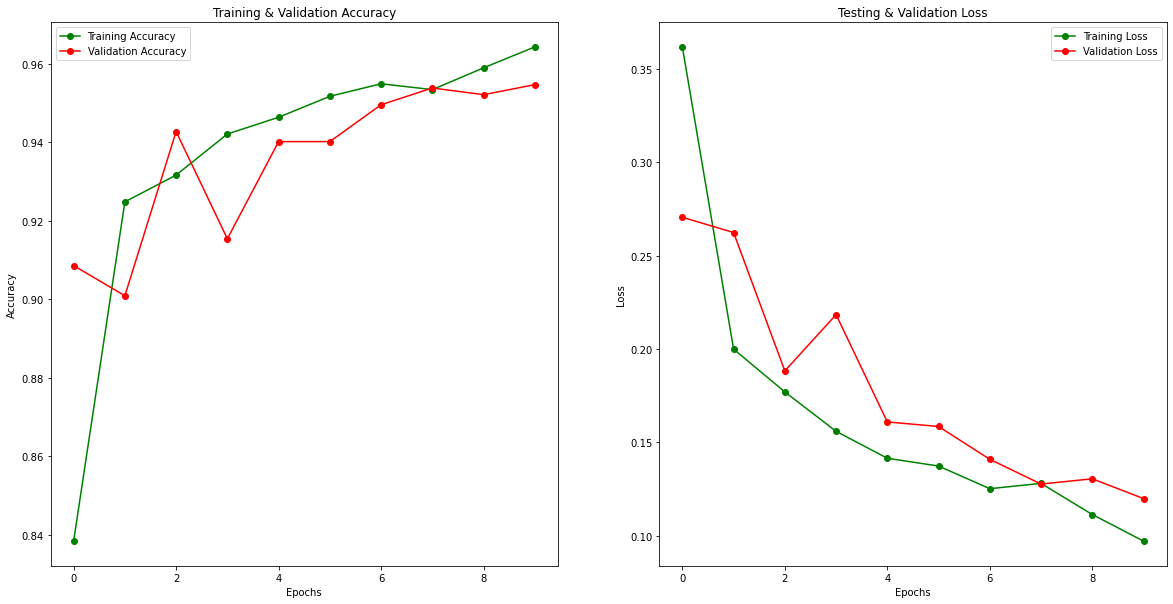

In [22]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

<AxesSubplot:>

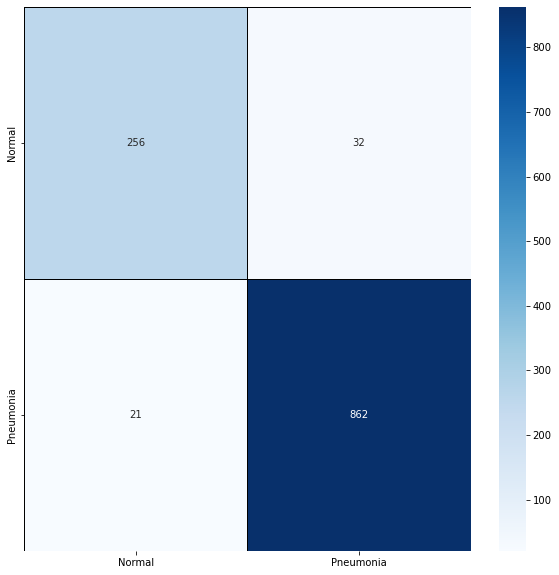

In [23]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(confusion,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = class_names,yticklabels = class_names)